<div align="center">
    <h1>Reinforcement Learning</h1>
</div>

![teaser](assets/teaser.gif)

## What is Reinforcement Learning

Reinforcement Learning is a field in Machine Learning that deals with modelling an intelligent agent that can perform tasks in a dynamic environment. **Now what does this mean??**

## Understanding some other terms

- **Artificial Intelligence and Machine Learning**: Artificial Intelligence means getting a computer to mimic human behaviour in some way. While some people falsely consider AI a technology, the more accurate approach would be seeing it as a broad concept in which machines can deal with tasks in a way we would call intelligent or smart. **So is Artificial Intelligence and Machine learning the same?** Not really! Artificial Intelligence is a broader concept while machine learning is a very common application of AI. We should understand machine learning as a current application of AI that is focused on the development of computer programs that can access data and learn from it automatically, without human assistance or intervention. 
- **Supervised Learning**: In supervised learning, we train a model with data which is already labelled or in simpler words we have a dataset which contains information about what the actual output must look like. So once the model learns from this “Training data” it tries to predict the output for a new set of examples by establishing a relationship between the input and output.

![supervised-learning](assets/supervised-learning.gif)

Now lets say we want to train a model to play Mario. In a supervised setting, we would let a pro-player play the game and log his/her moves to build a dataset. Now all we need to do is train a model to imitate the actions of this player. But this has too main shortcomings:

- It is quite a tedious task to build this dataset by logging a player's actions. 
- Since we are training a model to imitate the actions of another player, it can never be better than that human player. **So is there a way to train a model to play a game entirely by itself?** Yes there is and this is called **Reinforcement Learning**. 

## So how does it work??

Lets first try to build some intuition before we go into the specifics. In our lives, we all have to perform actions to pursue our dream. As we keep progressing, we try out different paths and try to figure out which actions give us the most rewards. Ideally, we would learn from the feedback we receive for our actions and try to keep improving ourselves. 

**Lets introduce some terms here.** Our reality is an **environment** where we perform numerous **actions**. We receive positive or negative **rewards** for our actions taken based on the **state** we are in. Finally, we modify/strengthen our actions to receive maximum reward. 

![rl](assets/reinforcement-learning.png)

Reinforcement Learning is also analogous to our lives. *It deals with solving a particular kind of problem where decision making is sequential, and the goal is long-term, such as game playing, robotics, resource management, or logistics.*

There are various technicques to perform Reinforcement Learning and one of the simplest one is **Q Learning**

### Q Learning

Lets go back to building some intuition. I have this grid of 9 squares and we need an agent to go from location "START" to "END".

![](assets/q-1.png)

- Our states here correspond to different locations in this grid and we map them to some index numbers. For example: (0,0) - state 0, (0,1) - state 1, (0,2) - state 3, (1,0) - state 4 and so on.
- The actions are basically movement (i.e) left, right, up and down. 
- The agent receives a reward based on how close we are to the finish point.

Now what is the easiest way to do this given the above start and finish. We chalk out a trajectory for the agent to follow. 

![](assets/q-2.png)

But what if we start somewhere else, like in the following case. The agent has no way to know which direction to go to. 

![](assets/q-3.png)

This is because, in this programatical approach to solving this problem the agent has no way to remember which direction to proceed. **Here comes the bellman equation**

$V(s) = R(s, a) + \gamma*V(s')$

```
where 
- s is the state
- a is the action
- R is the reward function
- V is the value of being in that particular state
- gamma is the discount factor which essentially means how much of the future really matters to us
``` 

![](assets/q-4.png)

### Modelling some stochasticity

Now its very possible that our agent while traversing through this environment does not perform the exact action it needs to. There is some change for malfunction meaning i tell it to go up and it goes down. So we must find some way to incorportate this factor onto the bellman equation. This is done by accounting for the expectation of such a random situation:

$V(s) = R(s, a) + \gamma*\sum_{i=1}^n s'P(s,a,s')*V(s')$

```
where P(s,a,s') is the probability of the agent performing an action a from state s to move to state s'.
```

in simple words, lets consider the following probabilities to perform the actions. 

![](assets/q-5.png)

now our value function becomes - $V(s) = R(s,a) + \gamma*(0.7*V(going-up) + 0.1*V(going-left) + ....)$

As of now we have rewarded the agent for going to the final destination. Ideally we need to provide a reward function for every state for it to asses the quality of its own actions. Next we will talk about Q values.

### Q Values

Instead of modelling the value of a state, its more easier to compute the quality of performing every action in a given state and say that the value of that state is equal to the maximum of all possible Q(s,a). So our bellman equation becomes:

$V(s) = R(s, a) + \gamma*\sum_{i=1}^n P(s,a,s')*Q(s',a')$

### Temporal Difference

Now that we have defined our value function, lets see how to make the agent figure out on its own the value of being in each state rather than us defining it. Sounds fancy?, its pretty simple. Let's assume we know the value of Q(s,a) at some state a. Now if we perform an action and move to the next. Since our environment is dynamic, it will receive some reward for going to this next state which may not have been seen before. So we need to update the Q values of state and action using the observation we just received. The difference between this and the already known value is know as temporal difference.

$Q_{new}(s,a) = R(s, a) + \gamma*\sum_{i=1}^n P(s,a,s')*Q(s',a')$ and  $TD = Q_{new}(s,a) - Q(s,a)$

Since each time our environment might change drastically, we do not want to update the q values suddenly to this new one. We need the agent to slowly figure out what works and what does not. Hence we add one last term to update the Q values $\alpha$ which is nothing but the learning rate.

$Q_{t}(s,a) = Q_{t-1}(s,a) + \alpha*TD_{t}(a,s)$

**Enough theory lets try implementing this to play the snake game**

## First things first, we need to build our environment

In [193]:
import numpy as np
import random

actions = {"up":0, "left":1, "down":2, "right":3}

class SnakeEnv:
    def __init__(self, board_size):
        self.h, self.w = board_size
        self.reset()
    def reset(self):
        self.board = np.zeros((self.h, self.w, 3), dtype=np.int32)
        self.snake_body = []
        self.head_x, self.head_y = random.randint(0, self.w-1), random.randint(0, self.h-1)
        self.snake_body.append([self.head_x, self.head_y])
        self._spawnfood()
        self.score = 0
        self.frames = []
    def _spawnfood(self):
        self.food_pos = [random.randint(0, self.w-1), random.randint(0, self.h-1)]
        while self.food_pos in self.snake_body:
            self.food_pos = [random.randint(0, self.w-1), random.randint(0, self.h-1)]
    def move(self, action):
        x, y = self.head_x, self.head_y
        if actions[action] == 0:
            y -= 1
        elif actions[action] == 1:
            x -= 1
        elif actions[action] == 2:
            y += 1
        elif actions[action] == 3:
            x += 1
        else:
            raise Exception("Invalid action")
        
        self.snake_body.insert(0, [x,y])
        self.head_x, self.head_y = x, y
        if x == self.food_pos[0] and y == self.food_pos[1]:
            self.score += 1
            self._spawnfood()
        else:
            self.snake_body.pop()
            
        if self.head_x < 0 or self.head_x >= self.w or self.head_y < 0 or self.head_y >= self.h:
            print("out of bounds")
            return False
        for pos in self.snake_body[1:]:
            if pos[0] == self.head_x and pos[1] == self.head_y:
                print("bit yourself")
                return False
        
        board = np.copy(self.board)
        for pos in self.snake_body:
            board[pos[1],pos[0]] = [0,255,0]
        board[self.food_pos[1], self.food_pos[0]] = [255,0,0]
        self.frames.append(board)
        
        
        return True    

In [208]:
from matplotlib import animation
import matplotlib.pyplot as plt

def anim_frames(frames):
    print(len(frames))
    h, w, _ = frames[0].shape
    fig, ax = plt.subplots()
    im = ax.imshow((np.ones((h, w, 3))))
    def update(i):
        im.set_data(frames[i])
        return (im,)
    anim = animation.FuncAnimation(fig, update,frames=len(frames), blit=True)
    return anim

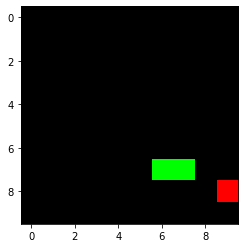

In [204]:
# test_game = SnakeEnv((10,10))
action = "right"
alive = test_game.move(action)
plt.imshow(test_game.frames[-1])
plt.show()

8


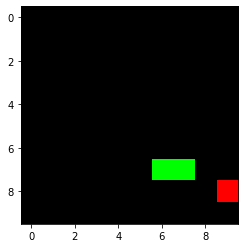

In [296]:
anim = anim_frames(test_game.frames)
anim.save('out.mp4', fps=5, extra_args=['-vcodec', 'libx264'])
plt.show()
from IPython.display import HTML
from base64 import b64encode
mp4 = open('out.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## Back to Q Learning

In [292]:
import numpy as np
import random

actions = {"up":0, "left":1, "down":2, "right":3}

class SnakeEnv:
    def __init__(self, board_size):
        self.h, self.w = board_size
        self.reset()
    
    def reset(self):
        self.board = np.zeros((self.h, self.w, 3), dtype=np.int32)
        self.snake_body = []
        self.head_x, self.head_y = random.randint(0, self.w-1), random.randint(0, self.h-1)
        self.snake_body.append([self.head_x, self.head_y])
        self._spawnfood()
        self.score = 0
        self.frames = []
        food_state = self._food_direction()
        boundary_state = self._check_boundary()
        self.state = food_state + boundary_state
        self._draw_board()
        return self.state
    
    def _check_boundary(self):
        boundary_state = [0,0,0,0]
        if self.head_y == 0:
            boundary_state[0] = 1
        if self.head_x == 0:
            boundary_state[1] = 1
        if self.head_y == self.h:
            boundary_state[2] = 1
        if self.head_x == self.w:
            boundary_state[3] = 1
        
        for pos in self.snake_body[1:]:
            if pos[1] == self.head_y - 1 and pos[0] == self.head_x:
                boundary_state[0] = 1
            if pos[0] == self.head_x - 1 and pos[1] == self.head_y:
                boundary_state[1] = 1
            if pos[1] == self.head_y + 1 and pos[0] == self.head_x:
                boundary_state[2] = 1
            if pos[0] == self.head_x + 1 and pos[1] == self.head_y:
                boundary_state[3] = 1
    
        return boundary_state
    
    def _spawnfood(self):
        self.food_pos = [random.randint(0, self.w-1), random.randint(0, self.h-1)]
        while self.food_pos in self.snake_body:
            self.food_pos = [random.randint(0, self.w-1), random.randint(0, self.h-1)]
    
    def _food_direction(self):
        rel_direction = [0,0,0,0]
        if self.food_pos[1] - self.head_y < 0:
            rel_direction[0] = 1
        if self.food_pos[0] - self.head_x < 0:
            rel_direction[1] = 1
        if self.food_pos[1] - self.head_y > 0:
            rel_direction[2] = 1
        if self.food_pos[0] - self.head_x > 0:
            rel_direction[3] = 1
        return rel_direction
    
    def _draw_board(self):
        board = np.copy(self.board)
        for pos in self.snake_body:
            board[pos[1],pos[0]] = [0,255,0]
        board[self.food_pos[1], self.food_pos[0]] = [255,0,0]
        self.frames.append(board)
    
    def step(self, action):
        x, y = self.head_x, self.head_y
        if action == 0:
            y -= 1
        elif action == 1:
            x -= 1
        elif action == 2:
            y += 1
        elif action == 3:
            x += 1
        else:
            raise Exception("Invalid action")
        
        done = False
        if x < 0 or x >= self.w or y < 0 or y >= self.h:
            done = True
        for pos in self.snake_body[1:]:
            if pos[0] == x and pos[1] == y:
                done = True
                break
        
        if done:
            reward = -30
        else:    
            food_state = self._food_direction()
            if food_state[action] == 1:
                reward = 10
            else: 
                reward = -10
            self.snake_body.insert(0, [x,y])
            self.head_x, self.head_y = x, y
            if x == self.food_pos[0] and y == self.food_pos[1]:
                self.score += 1
                self._spawnfood()
                reward = 50
            else:
                self.snake_body.pop()
            food_state = self._food_direction()
            boundary_state = self._check_boundary()
            self.state = food_state + boundary_state
                
        self._draw_board()
        
        return self.state, reward, done

In [301]:
num_states, num_actions = 2**8, 4
q_table = np.random.rand(num_states, num_actions)
num_episodes = 10000
gamma = 0.8
epsilon = 0.2
snake_game = SnakeEnv((16,16))
best_q_table = None
def calc_state_num(state):
    state_indx = 0
    for i in range(8):
        state_indx += 2**i*state[i]
    return state_indx

best = 0
lr = 0.1

for _ in range(num_episodes):
    state = snake_game.reset()
    state = calc_state_num(state)
    done = False
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, num_actions-1)
        else:
            action = np.argmax(q_table[state,:])
        next_state, reward, done = snake_game.step(action)
        next_state = calc_state_num(next_state)
        q_table[state, action] = (1-lr)*q_table[state, action] + lr*(reward + gamma*np.max(q_table[next_state, :]))
        state = next_state
    if snake_game.score > best:
        print("best: ", snake_game.score)
        best = snake_game.score
        best_q_table = q_table
# print(snake_game.score)
        

best:  1
best:  2
best:  3
best:  5
best:  7
best:  8
best:  9
best:  10
best:  12
best:  15


211


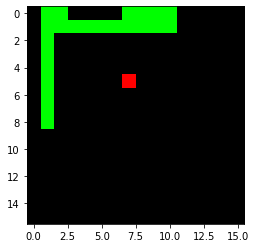

In [302]:
state = snake_game.reset()
state = calc_state_num(state)
done = False
while not done:
    action = np.argmax(q_table[state,:])
    next_state, reward, done = snake_game.step(action)
    next_state = calc_state_num(next_state)
    q_table[state, action] = reward + gamma*np.max(q_table[next_state, :])
    state = next_state

anim = anim_frames(snake_game.frames)
anim.save('out.mp4', fps=10, extra_args=['-vcodec', 'libx264'])
plt.show()
from IPython.display import HTML
from base64 import b64encode
mp4 = open('out.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)